In [70]:
import pandas as pd

# Set options to show all columns
pd.set_option('display.max_columns', None)

# Upload csv file
data = r'C:\repos\immo-eliza-team6-analysis\analysis\PL_clean_data.csv' # Fill your path to file
df = pd.read_csv(data, sep = ',')


df.dtypes


id                      int64
locality_name          object
Postal_code            object
Price                   int64
Subtype                object
Number_of_bedrooms      int64
Living_area             int64
street                 object
number                 object
latitude              float64
longitude             float64
Open_fire               int64
Swimming_Pool           int64
hasTerrace              int64
terraceSurface          int64
gardenSurface           int64
Kitchen_type           object
Number_of_facades       int64
State_of_building      object
Furnished               int64
epc                    object
dtype: object

In [71]:
# transform dtypes 'object' to 'category'
int_columns = df.select_dtypes(include=['object'])

for col in int_columns.columns:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7134 entries, 0 to 7133
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  7134 non-null   int64   
 1   locality_name       7134 non-null   category
 2   Postal_code         7134 non-null   category
 3   Price               7134 non-null   int64   
 4   Subtype             7134 non-null   category
 5   Number_of_bedrooms  7134 non-null   int64   
 6   Living_area         7134 non-null   int64   
 7   street              7134 non-null   category
 8   number              7108 non-null   category
 9   latitude            7125 non-null   float64 
 10  longitude           7125 non-null   float64 
 11  Open_fire           7134 non-null   int64   
 12  Swimming_Pool       7134 non-null   int64   
 13  hasTerrace          7134 non-null   int64   
 14  terraceSurface      7134 non-null   int64   
 15  gardenSurface       7134 non-null   in

In [72]:
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('ggplot')

df.corr(method='pearson', min_periods=1, numeric_only=True)

,id,Price,Number_of_bedrooms,Living_area,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Number_of_facades,Furnished
id,1.000000,-0.088953,-0.070675,-0.102077,0.045275,-0.079682,-0.017196,-0.044521,0.015576,-0.017218,-0.041391,-0.070148,-0.005120
Price,-0.088953,1.000000,0.357637,0.526756,0.217834,-0.063270,0.110082,0.281491,0.041604,0.043028,0.143753,0.156068,0.037925
Number_of_bedrooms,-0.070675,0.357637,1.000000,0.556377,0.025280,0.012521,0.093603,0.141250,0.043365,0.038342,0.089865,0.091020,0.026039
Living_area,-0.102077,0.526756,0.556377,1.000000,0.091314,0.025325,0.159373,0.247002,0.004876,0.042182,0.129285,0.151165,0.010488
latitude,0.045275,0.217834,0.025280,0.091314,1.000000,-0.495857,-0.010394,0.040160,-0.091840,-0.059083,-0.047032,-0.092381,-0.025019
longitude,-0.079682,-0.063270,0.012521,0.025325,-0.495857,1.000000,0.067524,0.047185,0.088021,0.077614,0.075080,0.237571,0.005698
Open_fire,-0.017196,0.110082,0.093603,0.159373,-0.010394,0.067524,1.000000,0.123685,0.053003,0.052960,0.086435,0.157827,0.009954
Swimming_Pool,-0.044521,0.281491,0.141250,0.247002,0.040160,0.047185,0.123685,1.000000,0.065466,0.050548,0.072294,0.129342,0.011787
hasTerrace,0.015576,0.041604,0.043365,0.004876,-0.091840,0.088021,0.053003,0.065466,1.000000,0.167575,0.047707,0.110604,0.042994
terraceSurface,-0.017218,0.043028,0.038342,0.042182,-0.059083,0.077614,0.052960,0.050548,0.167575,1.000000,0.097845,0.052146,0.017837


In [73]:
# Remove lines where 'Living-area' is = 0
df = df[df['Living_area'] != 0]

df.shape


(6980, 21)

In [74]:
# Removing unnecessary columns
    #columns_to_drop = ['latitude', 'longitude', 'id', 'Type_of_sale', 'street', 'number']
    #df = df.drop(columns=columns_to_drop, errors='ignore')
df['price_per_sqm'] = df['Price'] / df['Living_area']
df['post_1'] = df['Postal_code'].str[0].astype('int')
df['post_2'] = df['Postal_code'].str[0:2]

df['price_per_sqm'].describe()


count     6980.000000
mean      2400.692131
std       1463.714536
min        186.935372
25%       1662.051533
50%       2181.250000
75%       2790.462625
max      29133.858268
Name: price_per_sqm, dtype: float64

In [75]:
df['Living_area'].sort_values



<bound method Series.sort_values of 0       125
1       167
2       154
3       172
4       350
       ... 
7129    260
7130    169
7131    237
7132    215
7133    255
Name: Living_area, Length: 6980, dtype: int64>

In [76]:
df['post_1'].describe

<bound method NDFrame.describe of 0       9
1       9
2       2
3       1
4       1
       ..
7129    4
7130    8
7131    1
7132    6
7133    8
Name: post_1, Length: 6980, dtype: int64>

In [77]:
print(df.columns)

Index(['id', 'locality_name', 'Postal_code', 'Price', 'Subtype',
       'Number_of_bedrooms', 'Living_area', 'street', 'number', 'latitude',
       'longitude', 'Open_fire', 'Swimming_Pool', 'hasTerrace',
       'terraceSurface', 'gardenSurface', 'Kitchen_type', 'Number_of_facades',
       'State_of_building', 'Furnished', 'epc', 'price_per_sqm', 'post_1',
       'post_2'],
      dtype='object')


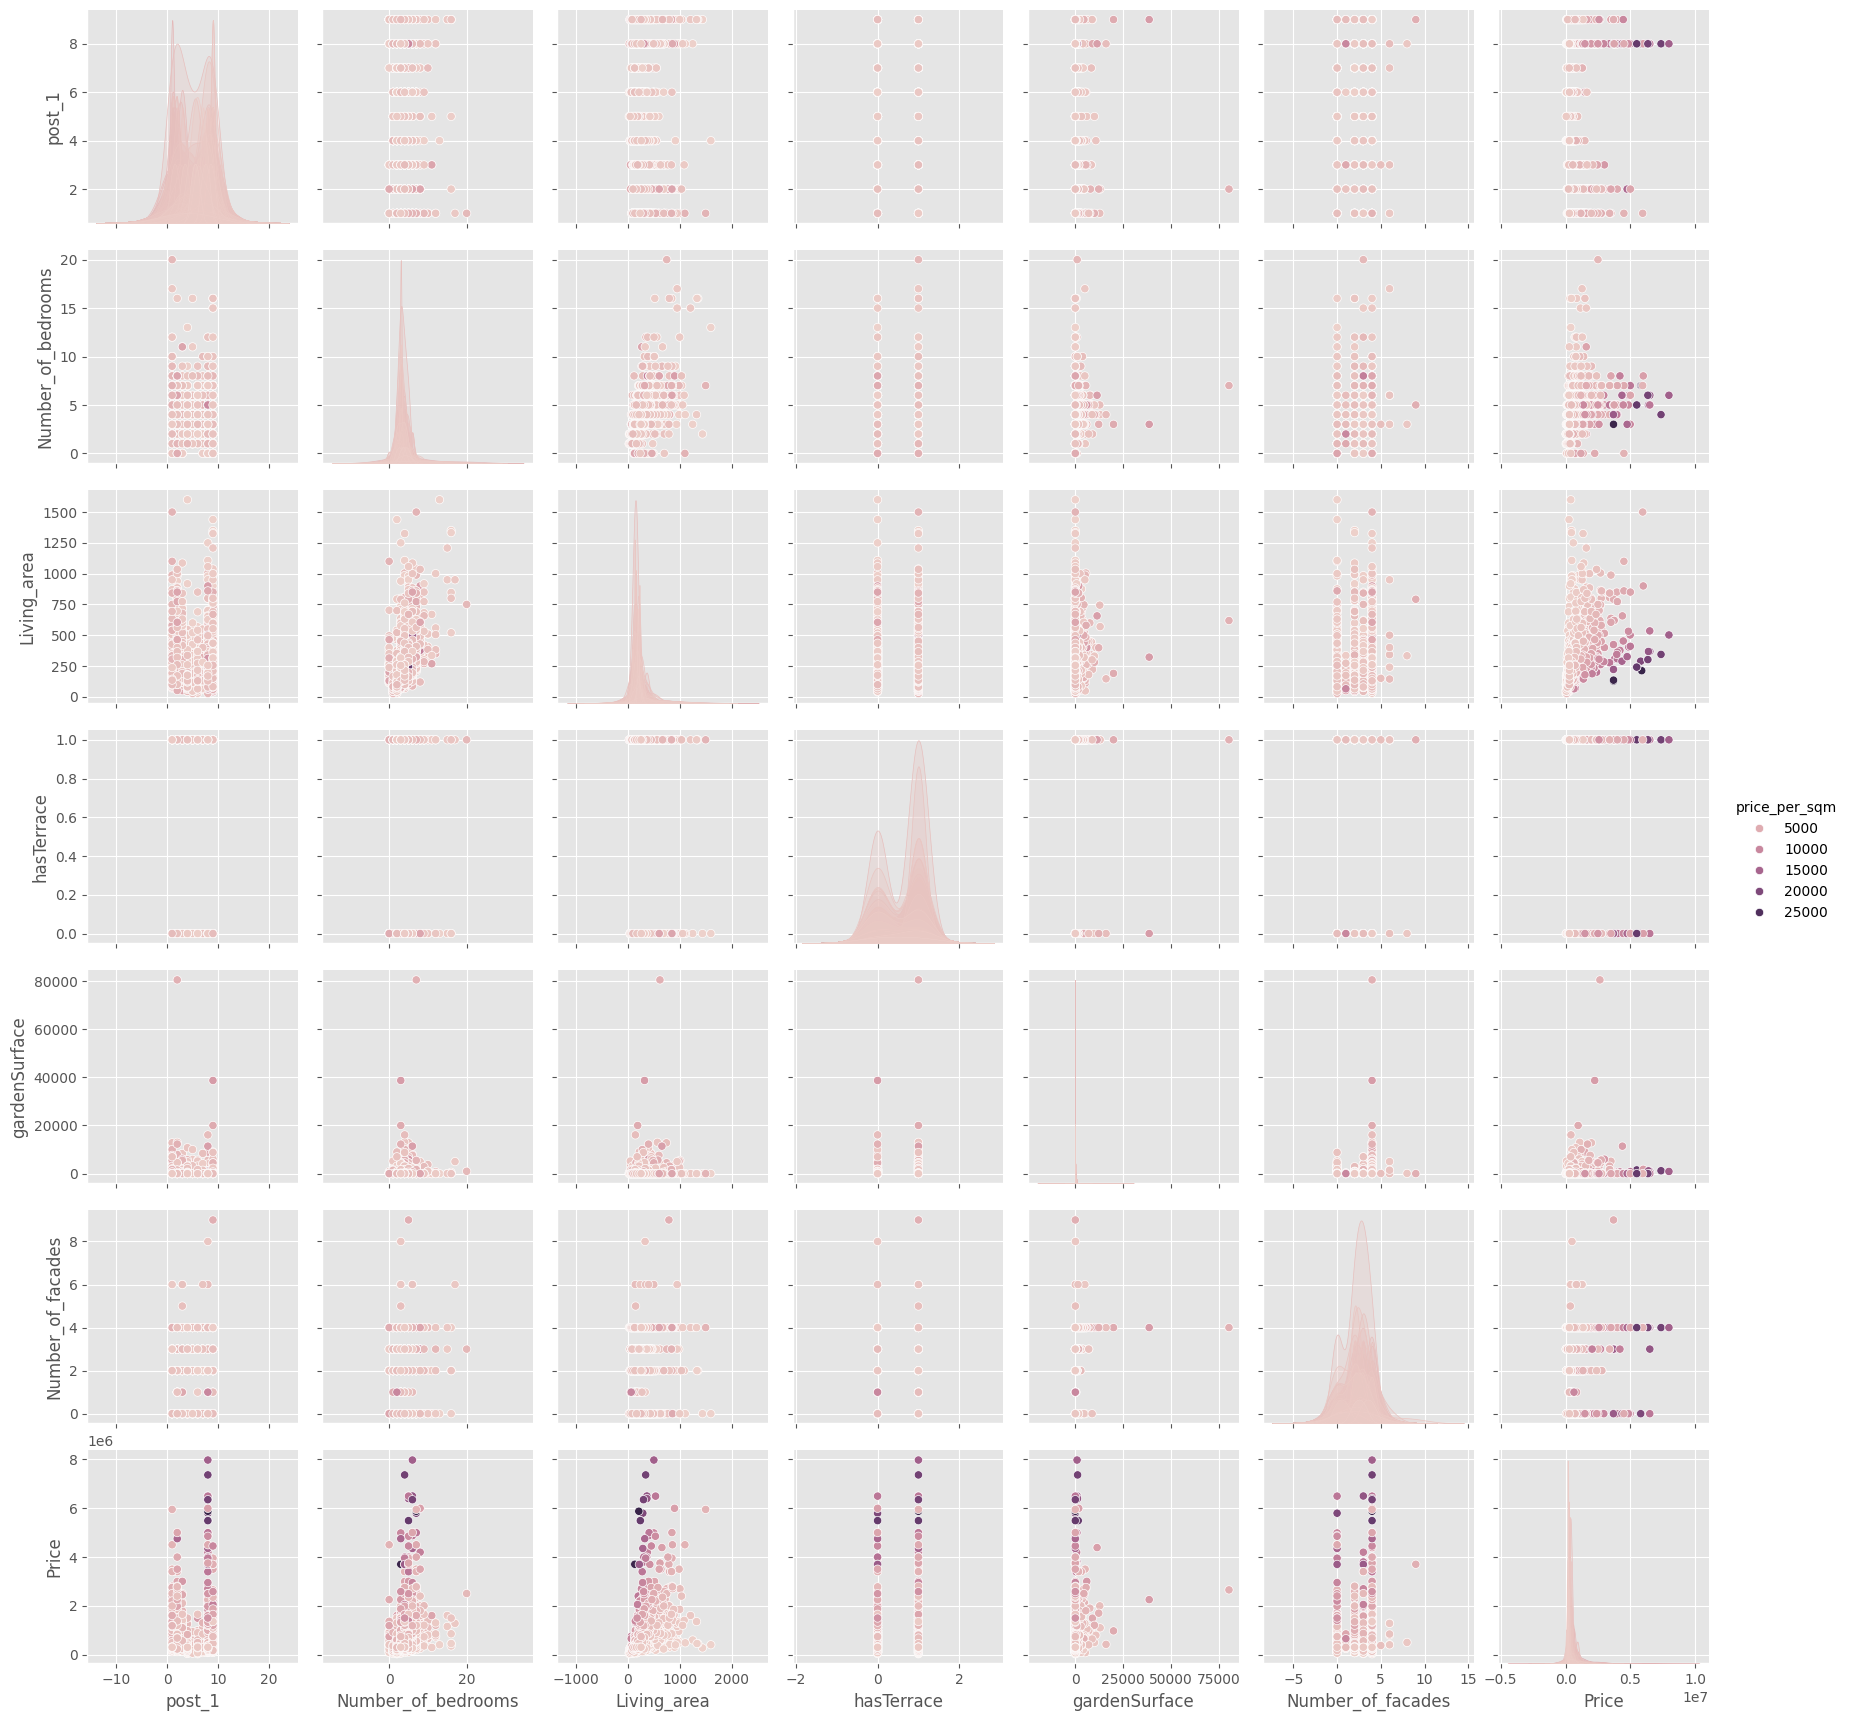

In [78]:


#cols_to_plot = ['Price', 'Subtype', 'Number_of_bedrooms', 'Living_area', 'Open_fire', 'Swimming_Pool', 'hasTerrace', 'gardenSurface' , 'Kitchen_type','Number_of_facades','State_of_building','Furnished','epc',,,'Furnished','epc',]
cols_to_plot = ['post_1','Number_of_bedrooms', 'Living_area', 'hasTerrace', 'gardenSurface' , 'Kitchen_type','Number_of_facades','State_of_building', 'price_per_sqm', 'Price']
sns.pairplot(df[cols_to_plot], hue='price_per_sqm')
plt.show()



In [79]:
# Apply the first condition: Flanders or Wallonie
df['region'] = df['Postal_code'].apply(
    lambda x: 'Flanders' if ('1500' < x < '4000') or ('8000' < x <= '9999') else 'Wallonie'
)

# Update 'region' to 'Brussels' for specific postal codes
df['region'] = df.apply(
    lambda row: 'Brussels' if '1000' < row['Postal_code'] < '1300' else row['region'], axis=1
)

# Display the first few rows
df.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,price_per_sqm,post_1,post_2,region
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,3.625722,0,0,1,0,370,NaN,4,To renovate,0,F,2552.000000,9,96,Flanders
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,3.925495,0,0,1,0,895,Installed,2,Good,0,D,1796.401198,9,95,Flanders
2,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,4.491795,0,0,1,10,20,Semi equipped,2,To renovate,0,E,1785.714286,2,28,Flanders
3,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,4.084293,0,0,1,0,300,NaN,3,To renovate,0,F,1715.116279,1,17,Flanders
4,20250985,Oetingen,1755,560000,House,4,350,Blijkheerstraat,70,50.775412,4.047057,0,0,1,40,32,Installed,3,Good,0,C,1600.000000,1,17,Flanders


<Axes: xlabel='post_1', ylabel='Count'>

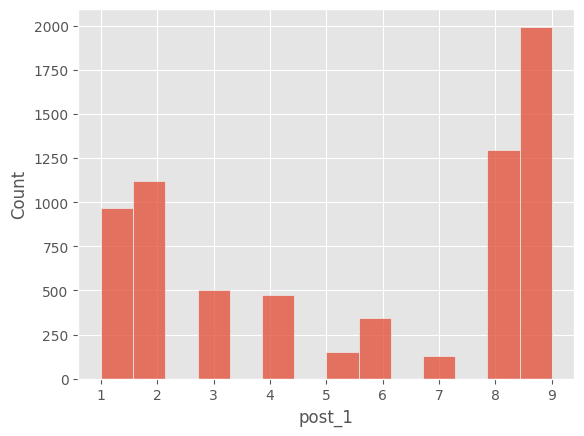

In [80]:
sns.histplot(df, x= 'post_1')

[(0.0, 900000.0)]

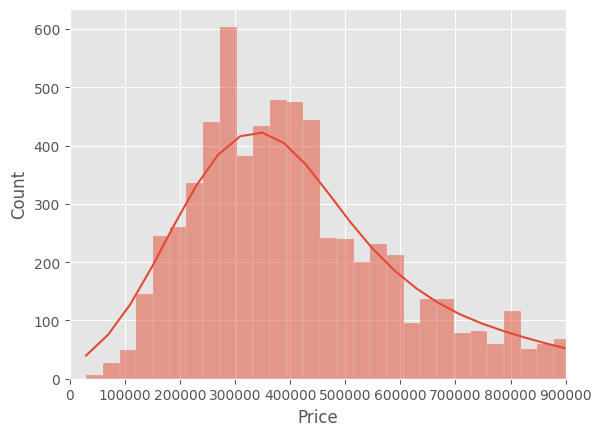

In [81]:
plotx= sns.histplot(df, x= 'Price', kde=True)
plotx.set(xlim=(0, 900000))

[(0.0, 800000.0)]

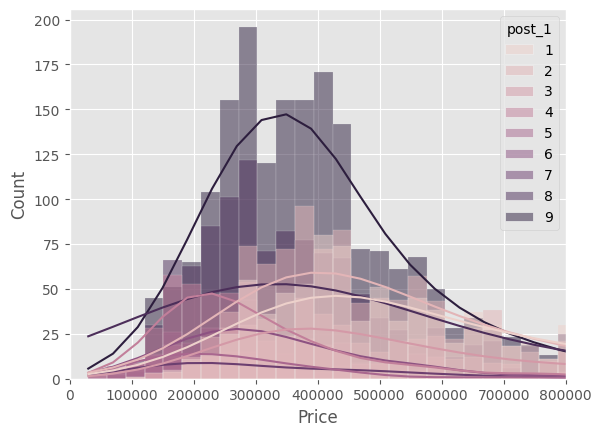

In [82]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "post_1")
plotx.set(xlim=(0, 800000))

[(0.0, 800000.0)]

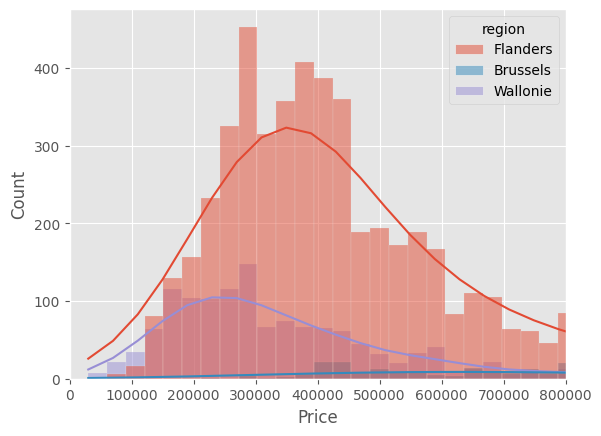

In [83]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "region")
plotx.set(xlim=(0, 800000))

In [86]:
# Group by region and postal code, then calculate the average price
avg_price_per_postal_code = df.groupby(['region', 'Postal_code'])['Price'].mean().reset_index()

# Find the postal code with the highest average price per region
max_avg_price_per_region = avg_price_per_postal_code.loc[
    avg_price_per_postal_code.groupby('region')['Price'].idxmax()
]

# Display the result
print(max_avg_price_per_region)

        region Postal_code         Price
19    Brussels        1190  1.552500e+06
1380  Flanders        8300  2.508152e+06
1612  Wallonie        1404  2.490000e+06


C:\Users\petra\AppData\Local\Temp\ipykernel_59048\3721815991.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_per_postal_code = df.groupby(['region', 'Postal_code'])['Price'].mean().reset_index()


In [88]:
# Group by region and calculate the average house price
avg_price_per_region = df.groupby('region')['Price'].mean().reset_index()

# Optional: Format the price values for readability
avg_price_per_region['Price'] = avg_price_per_region['Price'].map('{:,.2f}'.format)

# Display the result
print(avg_price_per_region)

     region       Price
0  Brussels  889,944.84
1  Flanders  543,111.20
2  Wallonie  364,498.09
